   A   B
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


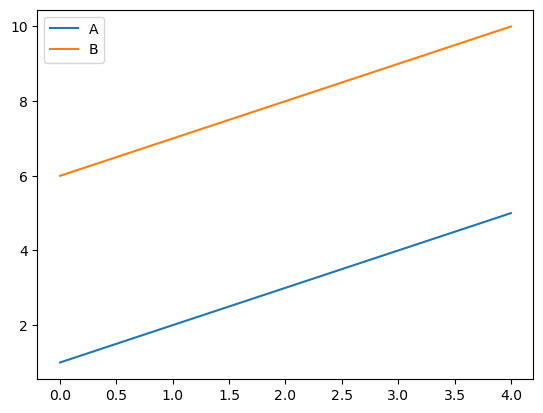

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = {"A": [1, 2, 3, 4, 5], "B": [6, 7, 8, 9, 10]}

df = pd.DataFrame(data)
print (df)

df.plot()
plt.show()

In [ ]:

df = pd.read_csv("/Users/sid/Documents/Personal/Study/Python/Assignment/Dataset/Lesson_04_Working_With_Pandas/Assisted_Practice_Dataset/weather_data.csv")

def day_with_suffix(x):
    try:
        n = int(x)
    except (ValueError, TypeError):
        return str(x)
    if 11 <= (n % 100) <= 13:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

df['Day_str'] = df['Day'].apply(day_with_suffix)

print(df.head())


   Day  Temperature  Precipitation Day_str
0    1    23.232203       2.645556     1st
1    2    25.727840       7.742337     2nd
2    3    24.041451       4.561503     3rd
3    4    23.173248       5.684339     4th
4    5    21.354822       0.187898     5th


In [ ]:
stats=df["Temperature"].agg(["mean","median","std"])
print(stats)

mean      23.716805
median    23.781060
std        4.274455
Name: Temperature, dtype: float64


In [17]:
def temp_category(t):
    try:
        v = float(t)
    except (ValueError, TypeError):
        return 'Unknown'
    if v < 10:
        return 'Low'
    if v <= 25:
        return 'Medium'
    return 'High'

In [18]:
if 'Temperature' in df.columns:
    df['Temp_cat'] = df['Temperature'].apply(temp_category)
else:
    df['Temp_cat'] = 'Unknown'

In [21]:
print(df.head())

   Day  Temperature  Precipitation Day_str Temp_cat
0    1    23.232203       2.645556     1st   Medium
1    2    25.727840       7.742337     2nd     High
2    3    24.041451       4.561503     3rd   Medium
3    4    23.173248       5.684339     4th   Medium
4    5    21.354822       0.187898     5th   Medium


In [22]:
stats=df["Precipitation"].agg(["mean","median","std"])
print(stats)

mean      4.517062
median    4.473759
std       2.567699
Name: Precipitation, dtype: float64


In [23]:

def precip_category(p):
    try:
        v = float(p)
    except (ValueError, TypeError):
        return 'Unknown'
    if v < 2:
        return 'Light'
    if v <= 10:
        return 'Moderate'
    return 'Heavy'

if 'Precipitation' in df.columns:
    df['Precip_cat'] = df['Precipitation'].apply(precip_category)
else:
    df['Precip_cat'] = 'Unknown'

print(df[['Day','Day_str','Temperature','Temp_cat','Precipitation','Precip_cat']].head())

   Day Day_str  Temperature Temp_cat  Precipitation Precip_cat
0    1     1st    23.232203   Medium       2.645556   Moderate
1    2     2nd    25.727840     High       7.742337   Moderate
2    3     3rd    24.041451   Medium       4.561503   Moderate
3    4     4th    23.173248   Medium       5.684339   Moderate
4    5     5th    21.354822   Medium       0.187898      Light


Weekly averages:
       Temperature  Precipitation
Week                            
1           23.40           4.73
2           25.83           5.42
3           22.80           4.18
4           23.33           4.01
5           22.02           3.55


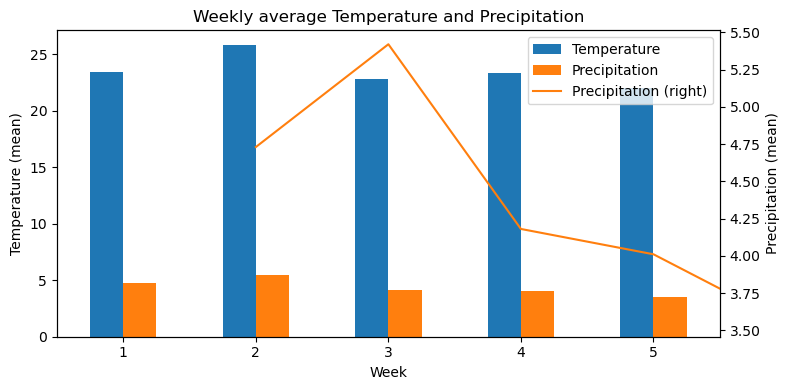

In [24]:
#	Iteration and data aggregation
#	Iterate over the DataFrame to calculate weekly averages of temperature and precipitation

import math

weekly = None

# Case A: use a Date column if available
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        weekly = df.set_index('Date').resample('W').agg({'Temperature':'mean', 'Precipitation':'mean'}).round(2)
    except Exception as e:
        print("Failed to parse Date column:", e)
        weekly = pd.DataFrame()

# Case B: fallback to numeric Day -> week number (1..)
elif 'Day' in df.columns:
    def safe_int(x):
        try:
            return int(x)
        except (ValueError, TypeError):
            return None

    df['Day_num'] = df['Day'].apply(safe_int)
    df_valid = df.dropna(subset=['Day_num'])
    if not df_valid.empty:
        df_valid['Week'] = ((df_valid['Day_num'] - 1) // 7) + 1
        weekly = df_valid.groupby('Week').agg({'Temperature':'mean', 'Precipitation':'mean'}).round(2)
    else:
        weekly = pd.DataFrame()

else:
    weekly = pd.DataFrame()

if weekly.empty:
    print("No weekly aggregation available.")
else:
    print("Weekly averages:\n", weekly)

    # Simple visual: bar plot with temperature and precipitation (precip on secondary y-axis)
    ax = weekly.plot(kind='bar', figsize=(8,4))
    if 'Precipitation' in weekly.columns:
        weekly['Precipitation'].plot(ax=ax, color='C1', secondary_y=True, legend=True)
        ax.set_ylabel('Temperature (mean)')
        ax.right_ax.set_ylabel('Precipitation (mean)')
    else:
        ax.set_ylabel('Temperature (mean)')
    plt.title('Weekly average Temperature and Precipitation')
    plt.tight_layout()
    plt.show()

In [6]:
dfh = pd.read_csv("/Users/sid/Documents/Personal/Study/Python/Assignment/Dataset/Lesson_10_Feature_Engineering/Dataset/housing_data.csv")
dfh.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


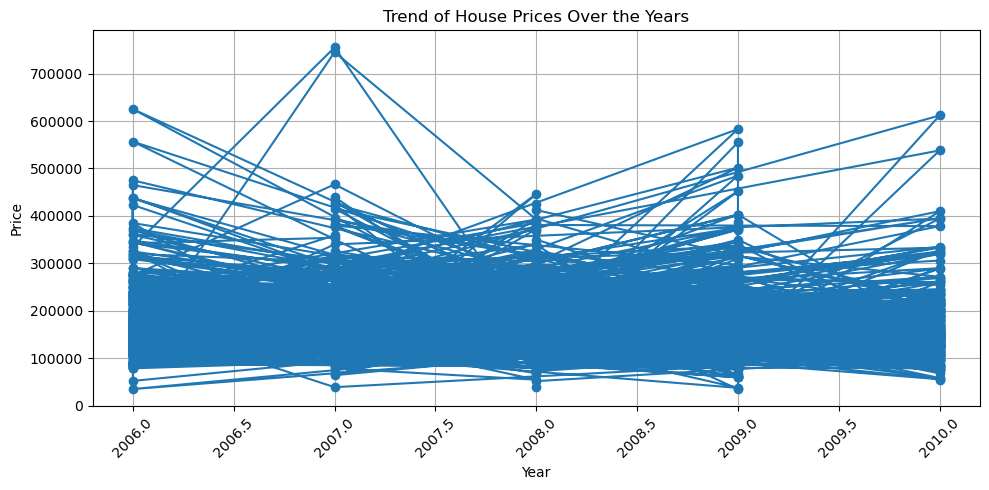

In [28]:
#1.	Create a line plot to visualize the trend of house prices over the years.

#1. Create a line plot to visualize the trend of house prices over the years.

# Assuming 'Year' and 'Price' columns exist in dfh
plt.figure(figsize=(10, 5))
plt.plot(dfh['YrSold'], dfh['SalePrice'], marker='o')
plt.title('Trend of House Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

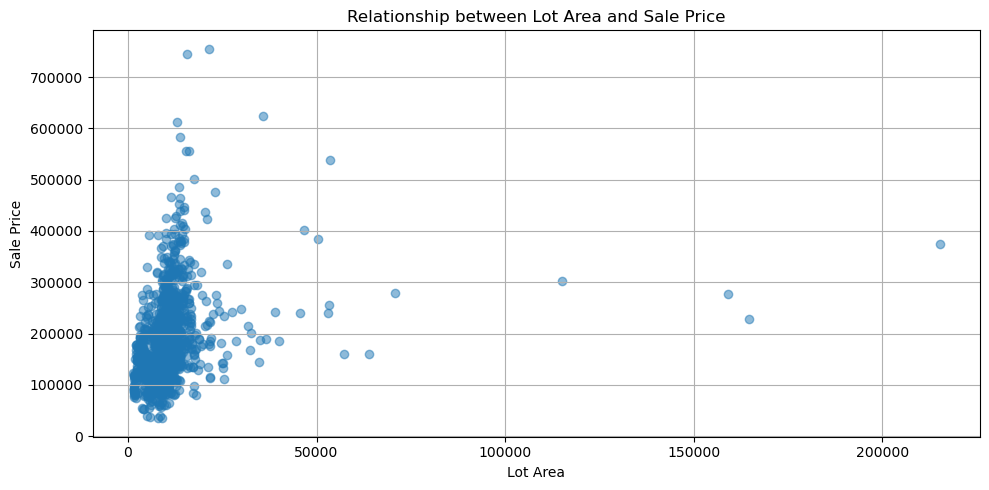

In [29]:
#2. Use a scatter plot to visualize the relationship between LotArea and SalePrice.

plt.figure(figsize=(10, 5))
plt.scatter(dfh['LotArea'], dfh['SalePrice'], alpha=0.5)
plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.grid()
plt.tight_layout()
plt.show()

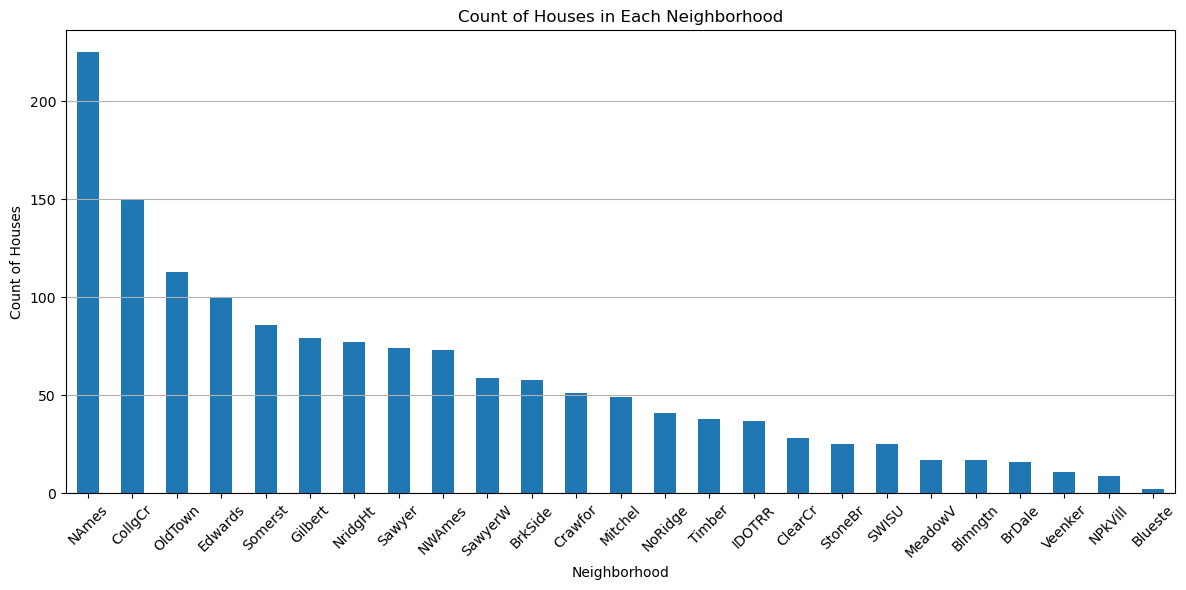

In [30]:
#3.	Create a bar chart to show the count of houses in each Neighborhood.


plt.figure(figsize=(12, 6))
dfh['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Count of Houses in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Houses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

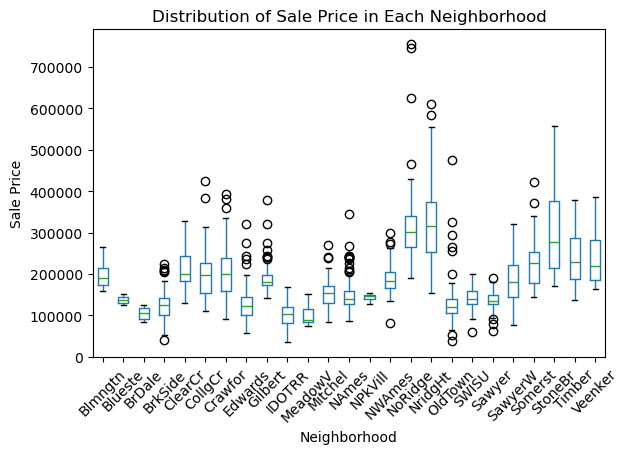

In [33]:
#4.	Use a box plot to visualize the distribution of SalePrice in each Neighborhood.


plt.figure(figsize=(12, 6))
dfh.boxplot(column='SalePrice', by='Neighborhood', grid=False)
plt.title('Distribution of Sale Price in Each Neighborhood')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

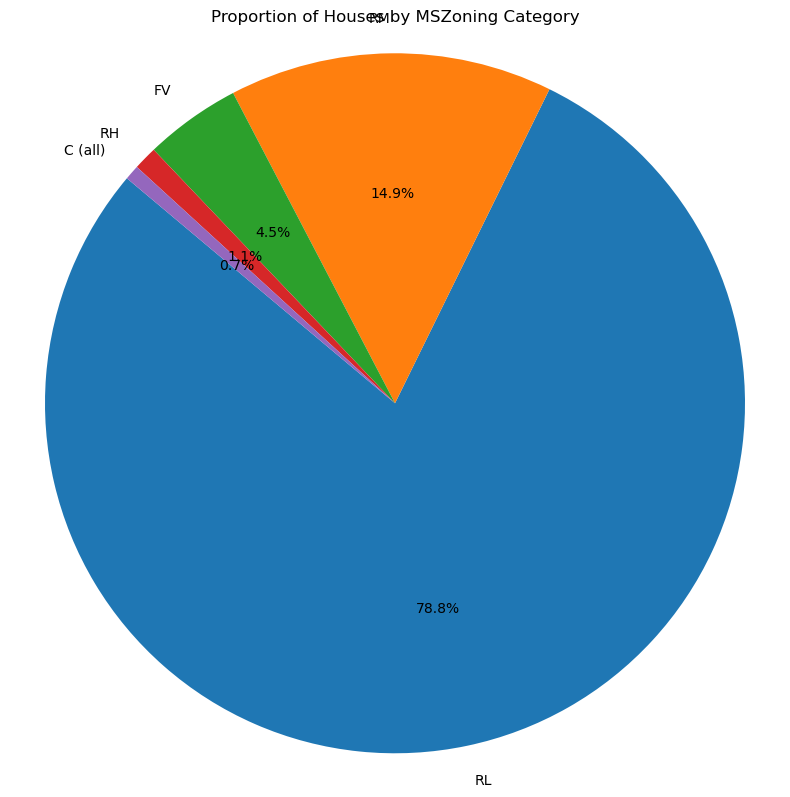

In [34]:
#5. Create a pie chart to visualize the proportion of houses that fall into each MSZoning category.

plt.figure(figsize=(8, 8))
mszoning_counts = dfh['MSZoning'].value_counts()
plt.pie(mszoning_counts, labels=mszoning_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Houses by MSZoning Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

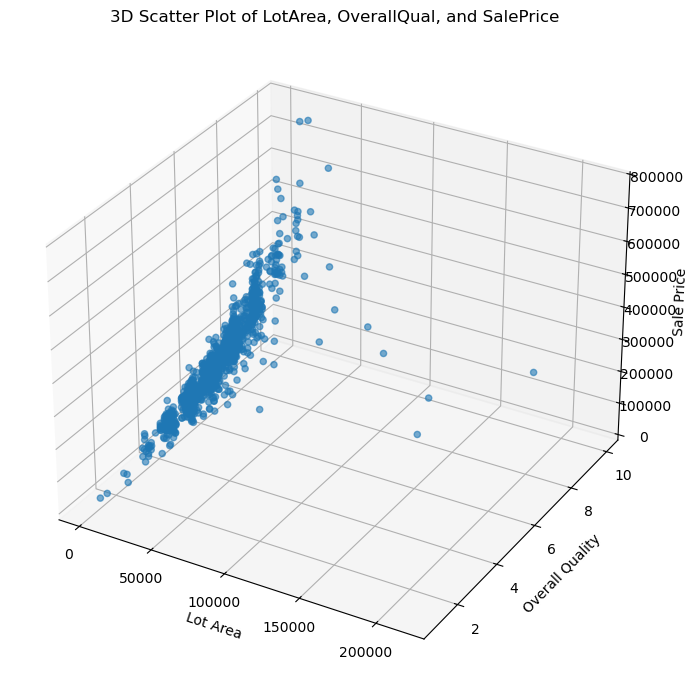

In [35]:
#6. Use a 3D scatter plot to visualize LotArea, OverallQual, and SalePrice together.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfh['LotArea'], dfh['OverallQual'], dfh['SalePrice'], alpha=0.6)

ax.set_title('3D Scatter Plot of LotArea, OverallQual, and SalePrice')
ax.set_xlabel('Lot Area')
ax.set_ylabel('Overall Quality')
ax.set_zlabel('Sale Price')

plt.tight_layout()
plt.show()